# Statistical Analysis of Onion prices and Rainfall in different cities

 # Questions:
 
 1. Is there any strong or weak correlation between rainfall & price of onion & Tomato ?
 2. Is there any differences of price between states / Regions?
 3. Is there any other factors apart from rainfall on the price of onion & Tomato?
 4. How to analyse the supply & demand and decide which crop to harvest as a farmer?
 5. which region is the best place to sell?
 6. Average price of Onions is 1300. Prove it with 95% confidence level


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import scipy.stats as stats
from scipy.stats import shapiro
from statsmodels.stats import weightstats as stests

In [2]:
data=pd.read_csv('Onion_weekly.csv')

In [4]:
data

,Year,CW,Location,Onion_Price,Rainfall
0,2015,1,Bangalore,1200,5.5
1,2015,2,Bangalore,1359,5.5
2,2015,3,Bangalore,1208,5.5
3,2015,4,Bangalore,1352,5.5
4,2015,5,Bangalore,1323,5.5
...,...,...,...,...,...
785,2017,48,Kolkata,4625,25.7
786,2017,49,Kolkata,4625,15.0
787,2017,50,Kolkata,4625,15.0
788,2017,51,Kolkata,4625,15.0


In [5]:
data.shape

(790, 5)

In [6]:
data.dtypes

Year             int64
CW               int64
Location        object
Onion_Price      int64
Rainfall       float64
dtype: object

In [7]:
data['Year']=data['Year'].astype('object',copy='False')
data['CW']=data['CW'].astype('object',copy='False')

In [8]:
data.dtypes


Year            object
CW              object
Location        object
Onion_Price      int64
Rainfall       float64
dtype: object

The categorical variables are Year, CW & Location.


The Numerical variables are Onion price & Rainfall 

In [9]:
data.isnull().sum()

Year           0
CW             0
Location       0
Onion_Price    0
Rainfall       0
dtype: int64

# description of the data

In [10]:
data.describe()

,Onion_Price,Rainfall
count,790.000000,790.000000
mean,1550.041772,225.254430
std,904.236131,303.469795
min,321.000000,0.000000
25%,796.000000,9.500000
50%,1392.000000,71.800000
75%,1910.750000,375.800000
max,5533.000000,1272.100000


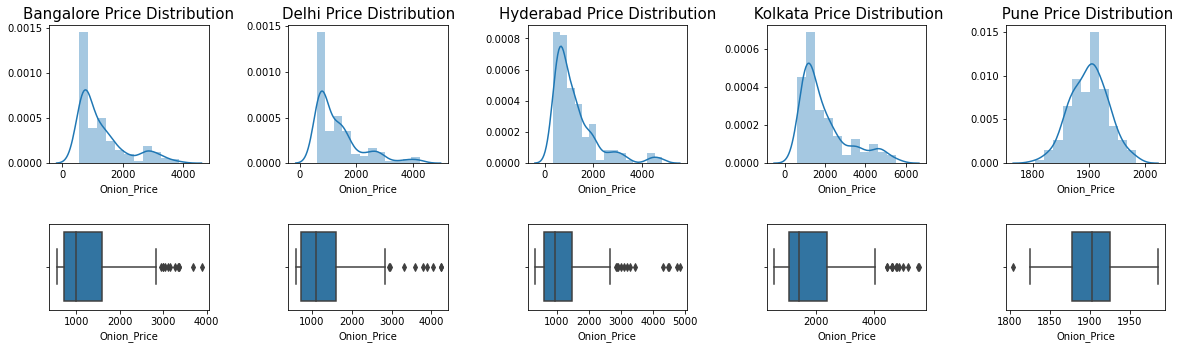

In [11]:
from matplotlib import gridspec
plt.rcParams['figure.figsize'] = [20,10]
gs = gridspec.GridSpec(5,5, width_ratios=[15, 15, 15, 15, 15], height_ratios=[.80, .50, .15, .15, .15],hspace =1, wspace=0.5)
a1 = plt.subplot(gs[0, 0])
a1.set_title("Bangalore Price Distribution", fontsize=15)
a1=sns.distplot(data[data['Location']=='Bangalore']['Onion_Price'])

a2 = plt.subplot(gs[0, 1])
a2.set_title("Delhi Price Distribution", fontsize=15)
a2=sns.distplot(data[data['Location']=='Delhi']['Onion_Price'])

a3 = plt.subplot(gs[0, 2])
a3.set_title("Hyderabad Price Distribution", fontsize=15)
a3=sns.distplot(data[data['Location']=='Hyderabad']['Onion_Price'])

a4 = plt.subplot(gs[0, 3])
a4.set_title(" Kolkata Price Distribution", fontsize=15)
a4=sns.distplot(data[data['Location']=='Kolkata']['Onion_Price'])

a5 = plt.subplot(gs[0, 4])
a5.set_title(" Pune Price Distribution", fontsize=15)
a5=sns.distplot(data[data['Location']=='Pune']['Onion_Price'])

b1 = plt.subplot(gs[1, 0])
b1= sns.boxplot(data[data['Location']=='Bangalore']['Onion_Price'])

b2 = plt.subplot(gs[1, 1])
b2= sns.boxplot(data[data['Location']=='Delhi']['Onion_Price'])

b3 = plt.subplot(gs[1, 2])
b3= sns.boxplot(data[data['Location']=='Hyderabad']['Onion_Price'])


b4 = plt.subplot(gs[1, 3])
b4= sns.boxplot(data[data['Location']=='Kolkata']['Onion_Price'])

b5 = plt.subplot(gs[1, 4])
b5 = sns.boxplot(data[data['Location']=='Pune']['Onion_Price'])




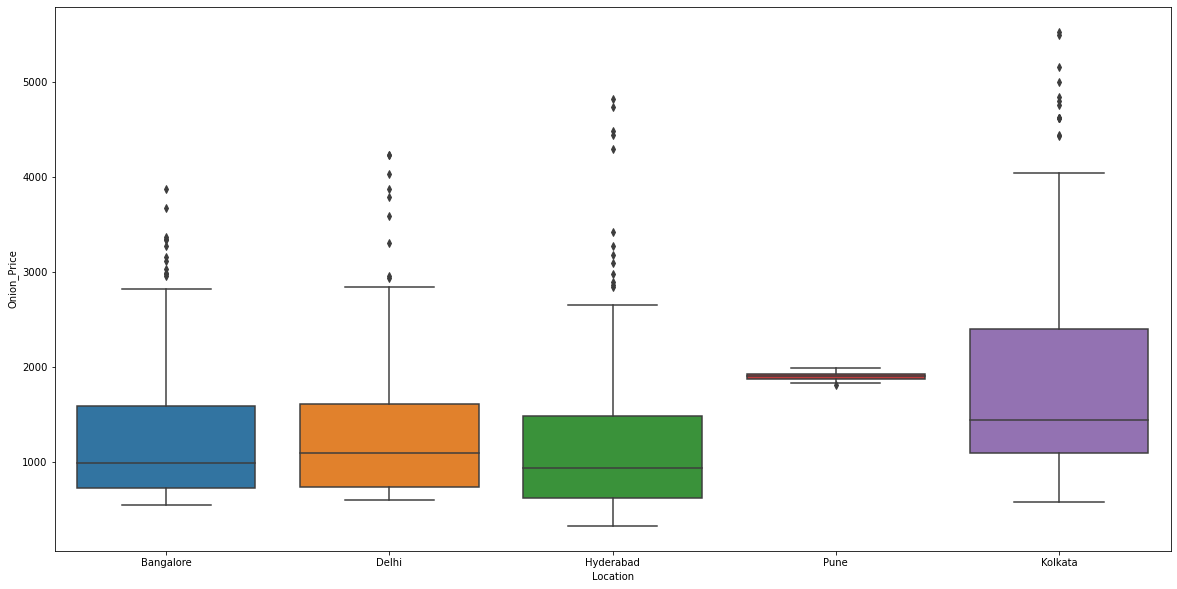

In [12]:
plt.rcParams['figure.figsize'] = [20,10]
sns.boxplot(x='Location',y='Onion_Price', data=data)
plt.show()

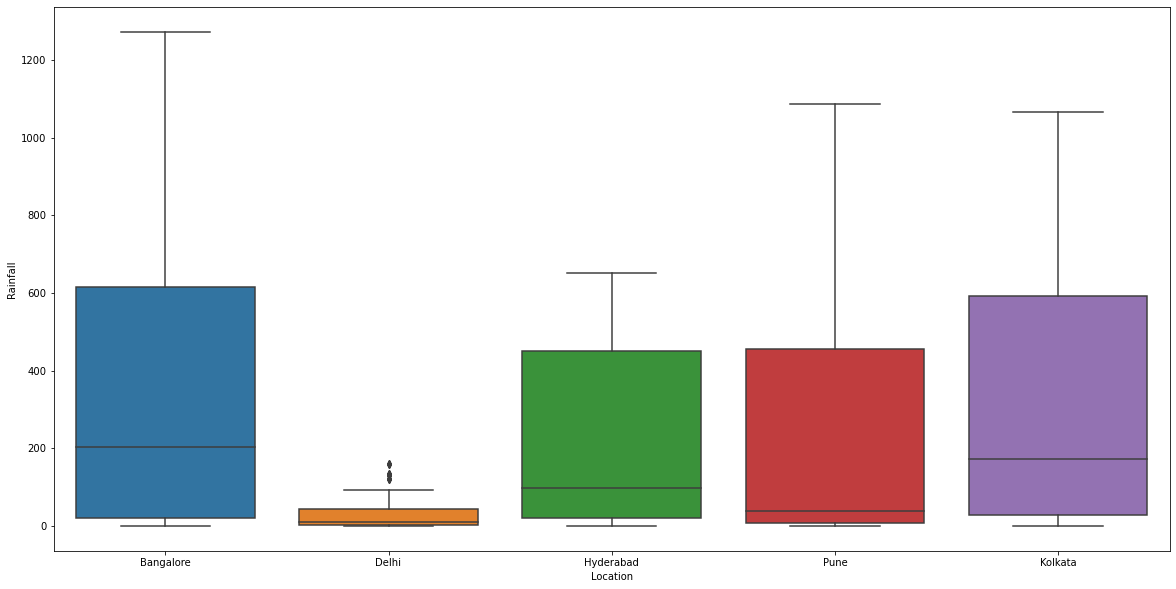

In [13]:
sns.boxplot(x='Location',y='Rainfall', data=data)
plt.show()

In [14]:
corr = data.corr()
corr

,Onion_Price,Rainfall
Onion_Price,1.000000,0.142714
Rainfall,0.142714,1.000000


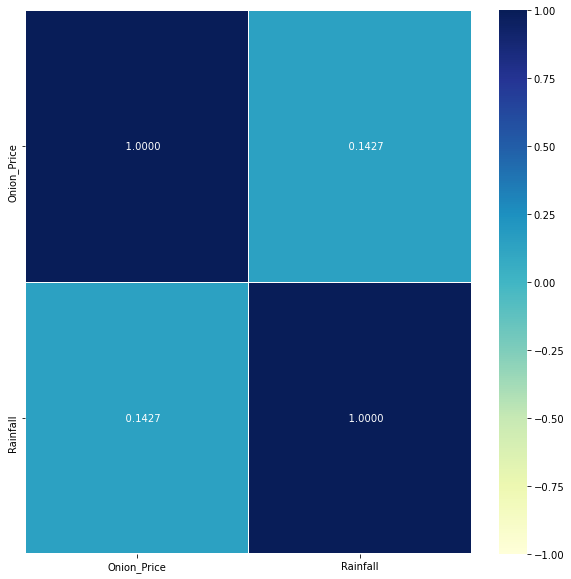

In [15]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot = True, linewidths = 0.05, vmin = -1 , vmax = 1, cmap = "YlGnBu" , fmt = '10.4f')
plt.show()

# Hypothesis Testing:


## 1. The prices of onions are compared between two years i.e. 2015 & 2017



Let  𝐹𝑋  be the distribution of onion prices in the year 2015 and  𝐹𝑌  be the distribution of onion prices in the year 2017.

Where,

The null and alternative hypothesis is:

H0:  𝐹𝑋=𝐹𝑌 
H1:  𝐹𝑋≠𝐹𝑌

In [16]:
data_2015=data[data['Year']==2015]['Onion_Price']
#to check the normlity of the data
stat, p_value = shapiro(data_2015)
print('P-Value:', p_value)

P-Value: 3.7240303143125296e-17


From the above result, we can see that the p-value is less than 0.05, thus we can say that the Onion prices in the year 2015 is  not normally distributed

In [17]:
data_2017=data[data['Year']==2017]['Onion_Price']
#to check the normlity of the data
stat, p_value = shapiro(data_2017)
print('P-Value:', p_value)

P-Value: 5.457577206997855e-13


From the above result, we can see that the p-value is more than 0.05, thus we can say that the Onion prices in the year 2017 is  normally distributed. 
Hence considering the above conditions, Mann-Whitney U Test will be applied for comparision


# Mann-Whitney U Test

In [18]:
test_stat, p_value = stats.mannwhitneyu(data_2015, data_2017, alternative = 'two-sided')

# print the test statistic and corresponding p-value
print('Test statistic:', test_stat)
print('p-value:', p_value)

Test statistic: 42825.5
p-value: 1.4413223135763865e-06


### Here the p-value is lesser than 0.05. Thus we reject  the null hypothesis and we can conclude that the average onion price is not same for both the years 2015 & 2017.

## 2.The prices of onions are compared between Bangalore and Kolkata

Let 𝐹𝑋 be the distribution of onion prices in Kolkata and 𝐹𝑌 be the distribution of onion prices in Bangalore.

Where,

The null and alternative hypothesis is:

H0: 𝐹𝑋<=𝐹𝑌 H1: 𝐹𝑋>𝐹𝑌

In [19]:
data_Bang=data[data['Location']=='Bangalore']['Onion_Price']
#to check the normlity of the data
stat, p_value = shapiro(data_Bang)
print('P-Value:', p_value)

P-Value: 3.7493898502431733e-13


In [20]:
data_Kolkata=data[data['Location']=='Kolkata']['Onion_Price']
#to check the normlity of the data
stat, p_value = shapiro(data_Kolkata)
print('P-Value:', p_value)

P-Value: 2.2534181551986388e-12


### From the above result, we can see that the p-value is more than 0.05, thus we can say that the Onion prices in Bangalore and Kolkata is not normally distributed. 

In [21]:
test_stat, p_value = stats.mannwhitneyu(data_Bang, data_Kolkata, alternative = 'greater')

# print the test statistic and corresponding p-value
print('Test statistic:', test_stat)
print('p-value:', p_value)

Test statistic: 7170.0
p-value: 0.9999999999696427


### Here the p-value is greater than 0.05. Thus we fail to reject  the null hypothesis and we can conclude that the average onion price of bangalore is not less than average onion price of the Kolkata

# 3.How are the seasons affecting on the price of onion?

In [22]:
#Adding a date coulum
data['date'] = pd.to_datetime(data.CW.astype(str)+
                           data.Year.astype(str).add('-1') ,format='%V%G-%u')

In [23]:
#Addition of seasons based on the dates. 
#Spring=1
#Summer=2
#Monsoon=3
#Winter=4
def season_of_date(date):
    year = str(date.year)
    seasons = {1: pd.date_range(start='01/02/'+year, end='31/03/'+year),
               2: pd.date_range(start='01/04/'+year, end='30/06/'+year),
               3: pd.date_range(start='01/07/'+year, end='15/09/'+year)}
    if date in seasons[1]:
        return 1
    if date in seasons[2]:
        return 2
    if date in seasons[3]:
        return 3
    else:
        return 4

# Assuming df has a date column of type `datetime`
data['season'] = data.date.map(season_of_date)

In [30]:
alpha=0.05
data.dropna(inplace=True)

m1 = data[data['season'] == 1]["Onion_Price"]
m2 = data[data['season'] == 2]["Onion_Price"]
m3 = data[data['season'] == 3]["Onion_Price"]
m4 = data[data['season'] == 4]["Onion_Price"]

test, p_val = stats.shapiro(m1)
print('P value for m1: ', p_val)

test, p_val = stats.shapiro(m2)
print('P value for m2: ', p_val)

test, p_val = stats.shapiro(m3)
print('P value for m3: ', p_val)

test, p_val = stats.shapiro(m3)
print('P value for m3: ', p_val)

test, p_val = stats.levene(m1,m2,m3)
print('P value for levene: ', p_val)



P value for m1:  5.254427115630733e-09
P value for m2:  2.27472679581453e-10
P value for m3:  2.1869107913463637e-10
P value for m3:  2.1869107913463637e-10
P value for levene:  6.81631922623761e-17


# KRUSKAL WALLIS H TEST
Now we are going to check whether the average price of onion is same or different based on theweather conditions.
The Null and Alternative Hypothesis is:


H0: Average price is the same for each Season.

H1: Average price is different for at least oneseason.



Using KRUSKAL WALLIS H TEST since we are trying to compare betweena categorical variable and a numerical variable for non parametric data.

KRUSKAL WALLIS H TEST helps us to determine how the seasons impact the price ranges of onion. 

In [31]:
test_stat, p_value = stats.kruskal(data[data['season'] == 1]["Onion_Price"],
              data[data['season'] == 2]["Onion_Price"],
              data[data['season'] == 3]["Onion_Price"],
                                   data[data['season'] == 4]["Onion_Price"])
print('P_value for Kruskal : ', p_value)
print('Significance level: ',alpha)

P_value for Kruskal :  2.534574336804502e-22
Significance level:  0.05


# Interpreting  p-value

We have to compare the p-value to our chosen alpha, in this case, 1.1983693306802372e-21.

Our p-value of 1.1983693306802372e-21 is less than 0,05, so we reject our null hypothesis and we accept our alternative. 

Even though the four season's sample means are different, we have a statistically significant difference.

This means that with the observed data, there is enough evidence to assume that the onion price is different accross all or atleast one season. 

Therefore we reject the null hypothesis and agree that the seasons have impact on the onion price ranges amoung the four states.

# CLT SIMULATION

In [10]:
def central_limit_theorem(df,column_names,n_samples = 1000, sample_size = 500):
    min_value = 0 
    max_value = df.count()  
    b = {}
    for i in range(n_samples):
        x = np.unique(np.random.randint(min_value, max_value, size = sample_size)) 
        b[i] = df[x].mean()   
    c = pd.DataFrame()
    c['sample'] = b.keys()   
    c['Mean'] = b.values()  
    plt.figure(figsize= (15,5))

    plt.subplot(1,2,2)
    sns.distplot(c.Mean,color='green')
    plt.title(f"Sampling Distribution. \n \u03bc = {round(c.Mean.mean(), 3)} & SE = {round(c.Mean.std(),3)}")
    plt.xlabel(column_names)
    plt.ylabel('freq')

    plt.subplot(1,2,1)
    sns.distplot(df,color='red')
    plt.title(f"Population Distribution. \n \u03bc = {round(df.mean(), 3)} & \u03C3 = {round(df.std(),3)}")
    plt.xlabel(column_names)
    plt.ylabel('freq')

    plt.show()

series1 = data["Onion_Price"]

# Simulation with sample size = 500 and no of samples = 50

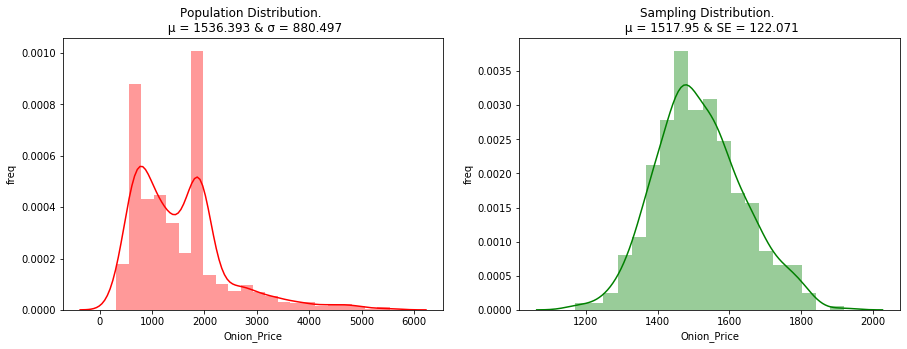

In [14]:
central_limit_theorem(series1,"Onion_Price",n_samples = 500, sample_size = 50)

# Simulation with sample size = 1000 and no of samples = 100

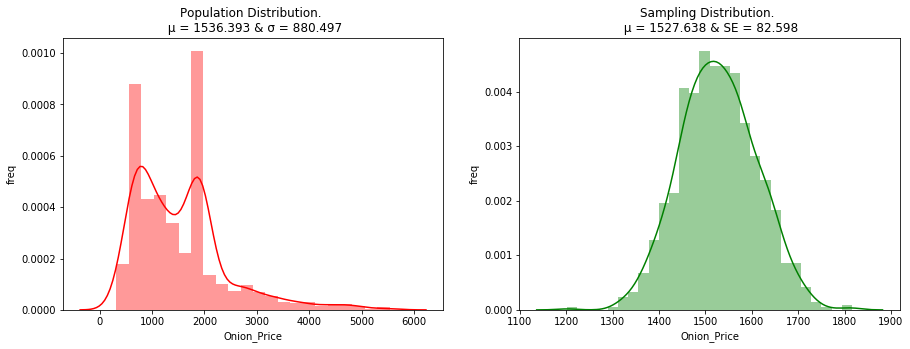

In [15]:
central_limit_theorem(series1,"Onion_Price",n_samples = 1000, sample_size = 100)

In [9]:
def central_limit_theorem(df,column_names,n_samples = 1000, sample_size = 500):
    min_value = 0 
    max_value = df.count()  
    b = {}
    for i in range(n_samples):
        x = np.unique(np.random.randint(min_value, max_value, size = sample_size)) 
        b[i] = df[x].mean()   
    c = pd.DataFrame()
    c['sample'] = b.keys()   
    c['Mean'] = b.values()  
    plt.figure(figsize= (15,5))

    plt.subplot(1,2,2)
    sns.distplot(c.Mean,color='green')
    plt.title(f"Sampling Distribution. \n \u03bc = {round(c.Mean.mean(), 3)} & SE = {round(c.Mean.std(),3)}")
    plt.xlabel(column_names)
    plt.ylabel('freq')

    plt.subplot(1,2,1)
    sns.distplot(df,color='red')
    plt.title(f"Population Distribution. \n \u03bc = {round(df.mean(), 3)} & \u03C3 = {round(df.std(),3)}")
    plt.xlabel(column_names)
    plt.ylabel('freq')

    plt.show()

series1 = data["Rainfall"]

# Simulation with sample size = 500 and no of samples = 50

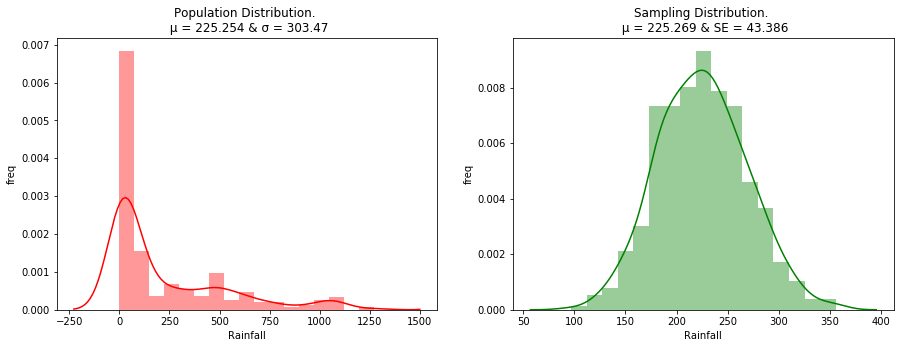

In [6]:
central_limit_theorem(series1,"Rainfall",n_samples = 500, sample_size = 50)

# Simulation with sample size = 1000 and no of samples = 100

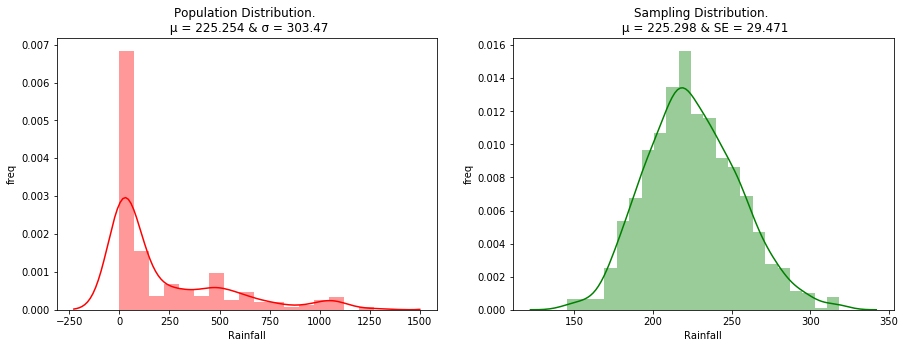

In [7]:
central_limit_theorem(series1,"Rainfall",n_samples = 1000, sample_size = 100)

# Increasing the sample size causes the error bound to decrease, making the confidence interval narrower